In [ ]:
#train and fine-tune a Decision Tree for the moons dataset.
from sklearn.datasets import make_moons
from sklearn.tree import DecisionTreeClassifier
X_moons, y_moons = make_moons(n_samples=10000, noise=0.4, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_moons, y_moons,
                                                    test_size=0.2,
                                                    random_state=42)
from sklearn.model_selection import GridSearchCV
#The params dictionary defines the hyperparameters and the range of values to be explored during grid search.
#In this case, it includes 'max_leaf_nodes', 'max_depth', and 'min_samples_split'.
params = {
    'max_leaf_nodes': list(range(2, 100)),
    'max_depth': list(range(1, 7)),
    'min_samples_split': [2, 3, 4]
}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42),
                              params,
                              cv=3)

grid_search_cv.fit(X_train, y_train)

grid_search_cv.best_estimator_

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score

y_pred = grid_search_cv.predict(X_test)
accuracy_score(y_test, y_pred)

0.8595

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
params = {
    'max_leaf_nodes': list(range(2, 100)),
    'max_depth': list(range(1, 7)),
    'min_samples_split': [2, 3, 4]
}

# Create a RandomForestRegressor instance
rf = RandomForestRegressor(random_state=42)

# Create a GridSearchCV instance
grid_search_cv = GridSearchCV(rf,
                              params,
                              cv=3)

# Fit the GridSearchCV to the training data
grid_search_cv.fit(X_train, y_train)

# Obtain the best estimator found by the grid search
best_estimator = grid_search_cv.best_estimator_

# Make predictions on the test data using the best estimator
y_pred = best_estimator.predict(X_test)

# Calculate the accuracy score
accuracy_score(y_test, y_pred)


ValueError: Classification metrics can't handle a mix of binary and continuous targets

creating and training a voting classifier in Scikit-Learn, composed of three diverse classifiers (the training set is the moons dataset)

In [ ]:
from sklearn.datasets import make_moons
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

voting_clf = VotingClassifier(
    estimators=[
        ('lr', LogisticRegression(random_state=42)),
        ('rf', RandomForestClassifier(random_state=42)),
        ('svc', SVC(random_state=42))
    ]
)
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('svc', SVC(random_state=42))])

In [ ]:

for name, clf in voting_clf.named_estimators_.items():
    print(name, "=", clf.score(X_test, y_test))

lr = 0.864
rf = 0.896
svc = 0.896


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC()
voting_clf = VotingClassifier(
 estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
 voting='hard')
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('rf', RandomForestClassifier()), ('svc', SVC())])

Let’s look at each classifier’s accuracy on the test set:

The voting classifier slightly outperforms all the individual classifi‐
ers.

In [ ]:
 from sklearn.metrics import accuracy_score
 for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  print(clf.__class__.__name__, accuracy_score(y_test, y_pred))


LogisticRegression 0.864
RandomForestClassifier 0.904
SVC 0.896
VotingClassifier 0.904


with voting="soft" and ensure that all classifiers can estimate class probabilities. This is not the case of the SVC class by default, so you need to set its probability hyperparameter to True

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC(probability=True)#as SVM does not predict the probability
voting_clf = VotingClassifier(
 estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
 voting='soft')
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('rf', RandomForestClassifier()),
                             ('svc', SVC(probability=True))],
                 voting='soft')

In [ ]:
 from sklearn.metrics import accuracy_score
 for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  print(clf.__class__.__name__, accuracy_score(y_test, y_pred))
  #Soft voting increases the accuracy

LogisticRegression 0.864
RandomForestClassifier 0.888
SVC 0.896
VotingClassifier 0.92


#bagging and pasting in scikit learn

The BaggingClassifier automatically performs soft voting
instead of hard voting if the base classifier can estimate class proba‐
bilities (i.e., if it has a predict_proba() method), which is the case
with Decision Trees classifiers.


In [ ]:
#bagging
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500,
                            max_samples=100, bootstrap=True, n_jobs=-1, random_state=42)
bag_clf.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), max_samples=100,
                  n_estimators=500, n_jobs=-1, random_state=42)

In [ ]:
y_pred = bag_clf.predict(X_test)
y_pred

array([0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0])

In [ ]:
 for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
  clf.fit(X_train, y_train)
  y_pred = bag_clf.predict(X_test)
  print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.904
RandomForestClassifier 0.904
SVC 0.904
VotingClassifier 0.904


In [ ]:
from sklearn.model_selection import cross_val_score
import numpy as np

scores = cross_val_score(bag_clf, X_train, y_train,
                         scoring="neg_mean_squared_error", cv=10)
bagging_rmse_scores = np.sqrt(-scores)

In [ ]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [ ]:
display_scores(bagging_rmse_scores)

Scores: [0.28097574 0.28097574 0.22941573 0.22941573 0.28097574 0.32879797
 0.23249528 0.16439899 0.32879797 0.2847474 ]
Mean: 0.2640996310904823
Standard deviation: 0.047955698425718674


In [ ]:
#pasting
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

paste_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500,
                            max_samples=100, bootstrap=False,n_jobs=-1, random_state=42)
paste_clf.fit(X_train, y_train)

BaggingClassifier(bootstrap=False, estimator=DecisionTreeClassifier(),
                  max_samples=100, n_estimators=500, n_jobs=-1,
                  random_state=42)

In [ ]:
y_pred = paste_clf.predict(X_test)
y_pred

array([0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0])

In [ ]:
 for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
  clf.fit(X_train, y_train)
  y_pred = paste_clf.predict(X_test)
  print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.92
RandomForestClassifier 0.92
SVC 0.92
VotingClassifier 0.92


In [ ]:
from sklearn.model_selection import cross_val_score
import numpy as np

scores = cross_val_score(paste_clf, X_train, y_train,
                         scoring="neg_mean_squared_error", cv=10)
pasting_rmse_scores = np.sqrt(-scores)

In [ ]:
display_scores(pasting_rmse_scores)

Scores: [0.28097574 0.32444284 0.28097574 0.22941573 0.28097574 0.32879797
 0.23249528 0.23249528 0.32879797 0.2847474 ]
Mean: 0.28041197094780673
Standard deviation: 0.03719343087472902


#Out-of-Bag Evaluation

With bagging, some instances may be sampled several times for any given predictor,
while others may not be sampled at all. By default a BaggingClassifier samples m
training instances with replacement (bootstrap=True), where m is the size of the
training set. This means that only about 63% of the training instances are sampled on
average for each predictor.6
 The remaining 37% of the training instances that are not
sampled are called out-of-bag (oob) instances. Note that they are not the same 37%
for all predictors.

Since a predictor never sees the oob instances during training, it can be evaluated on
these instances, without the need for a separate validation set. You can evaluate the
ensemble itself by averaging out the oob evaluations of each predictor.

In Scikit-Learn, you can set oob_score=True when creating a BaggingClassifier to
request an automatic oob evaluation after training. The following code demonstrates
this. The resulting evaluation score is available through the oob_score_ variable:

In [ ]:
bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500,
                            oob_score=True, bootstrap=True, n_jobs=-1, random_state=42) # Bootstrap determines whether this is bagging or pasting
bag_clf.fit(X_train, y_train)
bag_clf.oob_score_ #This shows the expected test accuracy

0.896

According to this oob evaluation, this BaggingClassifier is likely to achieve about
89% accuracy on the test set. Let’s verify this:


In [ ]:
from sklearn.metrics import accuracy_score

y_pred = bag_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.92

The oob decision function for each training instance is also available through the
oob_decision_function_ variable.

In this case (since the base estimator has a pre
dict_proba() method) the decision function returns the class probabilities for each
training instance. For example, the oob evaluation estimates that the first training
instance has a 68.25% probability of belonging to the positive class (and 31.75% of
belonging to the negative class):

In [ ]:
bag_clf.oob_decision_function_[:3]  # This will give us the probabilities for every training instance

array([[0.32352941, 0.67647059],
       [0.3375    , 0.6625    ],
       [1.        , 0.        ]])

In [ ]:
from sklearn.metrics import accuracy_score

y_pred = bag_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.92

If you randomly draw one instance from a dataset of size m, each instance in the dataset obviously has probability 1/m of getting picked, and therefore it has a probability 1 – 1/m of not getting picked. If you draw m instances with replacement, all draws are independent and therefore each instance has a probability (1 – 1/m)m of not getting picked. Now let's use the fact that exp(x) is equal to the limit of (1 + x/m)m as m approaches infinity. So if m is large, the ratio of out-of-bag instances will be about exp(–1) ≈ 0.37. So roughly 63% (1 – 0.37) will be sampled.

In [ ]:
# extra code – shows how to compute the 63% proba
print(1 - (1 - 1 / 1000) ** 1000)
print(1 - np.exp(-1))

0.6323045752290363
0.6321205588285577


#Random Patches and Random Subspaces

The random subspace method is an ensemble learning technique that trains individual models on different subsets of features (columns) of the training data.

Sampling both training instances and features is called the Random
Patches method.

Keeping all training instances (i.e., bootstrap=False and max_sam
ples=1.0) but sampling features (i.e., bootstrap_features=True and/or max_fea
tures smaller than 1.0) is called the Random Subspaces method.

Sampling features results in even more predictor diversity, trading a bit more bias for
a lower variance.


In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_moons

# Generate the make_moons dataset
X, y = make_moons(n_samples=1000, noise=0.4, random_state=42)

# Assuming X is your dataset with features
num_features = X.shape[1]

bag_clf_feature = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500,
                                max_features=min(num_features, 3), bootstrap_features=True, n_jobs=-1, random_state=42)
bag_clf_feature.fit(X, y)

BaggingClassifier(bootstrap_features=True, estimator=DecisionTreeClassifier(),
                  max_features=2, n_estimators=500, n_jobs=-1, random_state=42)

In [ ]:
y_pred = bag_clf_feature.predict(X_test)
y_pred

array([1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0])

In [ ]:
 for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
  clf.fit(X_train, y_train)
  y_pred = bag_clf_feature.predict(X_test)
  print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.832
RandomForestClassifier 0.832
SVC 0.832
VotingClassifier 0.832


#Random Forests

a Random Forest
 is an ensemble of Decision Trees, generally
trained via the bagging method (or sometimes pasting), typically with max_samples
set to the size of the training set. Instead of building a BaggingClassifier and passing it a DecisionTreeClassifier, you can instead use the RandomForestClassifier
class, which is more convenient and optimized for Decision Trees.

A Random Forest is equivalent to a bag of decision trees:

train a
Random Forest classifier with 500 trees (each limited to maximum 16 nodes), using
all available CPU cores:

a RandomForestClassifier has all the hyperparameters of a
DecisionTreeClassifier (to control how trees are grown), plus all the hyperpara
meters of a BaggingClassifier to control the ensemble itself.


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16,
                                 n_jobs=-1, random_state=42)
rnd_clf.fit(X_train, y_train)
y_pred_rf = rnd_clf.predict(X_test)

In [ ]:
print(clf.__class__.__name__, accuracy_score(y_test, y_pred_rf))

VotingClassifier 0.92


The following BaggingClassifier is
roughly equivalent to the previous RandomForestClassifier:

In [ ]:
bag_clf_random = BaggingClassifier(
 DecisionTreeClassifier(splitter="random", max_leaf_nodes=16),
 n_estimators=500, max_samples=1.0, bootstrap=True, n_jobs=-1)

In [ ]:
bag_clf_random.fit(X_train, y_train)
y_pred_bag_random= bag_clf_random.predict(X_test)
y_pred_bag_random

array([1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0])

In [ ]:
print(clf.__class__.__name__, accuracy_score(y_test, y_pred_bag_random))

VotingClassifier 0.92


In [ ]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(max_features="sqrt", max_leaf_nodes=16),
    n_estimators=500, n_jobs=-1, random_state=42)

In [ ]:
# extra code – verifies that the predictions are identical
bag_clf.fit(X_train, y_train)
y_pred_bag = bag_clf.predict(X_test)
np.all(y_pred_bag == y_pred_rf)  # same predictions

True

#Extra-Trees

The ExtraTreesClassifier is an ensemble machine learning algorithm that combines the predictions from many decision trees. It is similar to the RandomForestClassifier but uses a simpler algorithm to construct the decision trees used as members of the ensemble.

ExtraTreesClassifier with the make_moons dataset:

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.datasets import make_moons

# Generate the make_moons dataset
X, y = make_moons(n_samples=1000, noise=0.4, random_state=42)

# Create an ExtraTreesClassifier instance
extra_trees_clf = ExtraTreesClassifier(n_estimators=500,
                                   max_features=3)
#The max_features parameter is set to 3, which means that for each base estimator, a random subset of 3 features will be selected for training.
#The ExtraTreesClassifier does not have a bootstrap_features parameter.

# Fit the ExtraTreesClassifier on the make_moons dataset
extra_trees_clf.fit(X, y)

# Make predictions on the test data
y_pred_extre_trees = extra_trees_clf.predict(X)

# Calculate the accuracy score
accuracy_score(y, y_pred)

1.0

It is hard to tell in advance whether a RandomForestClassifier
will perform better or worse than an ExtraTreesClassifier. Gen‐
erally, the only way to know is to try both and compare them using
cross-validation (and tuning the hyperparameters using grid
search).


In [2]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_moons

# Generate the make_moons dataset
X, y = make_moons(n_samples=1000, noise=0.4, random_state=42)

# Define the parameter grid for RandomForestClassifier
params_rf = {
    'max_depth': list(range(1, 7)),
    'min_samples_split': [2, 3, 4],
    'max_features': ['sqrt', 'log2'],
    'n_estimators': [100, 200, 500, 1000]
}

# Define the parameter grid for ExtraTreesClassifier
params_et = {
    'max_depth': list(range(1, 7)),
    'min_samples_split': [2, 3, 4],
    'max_features': ['sqrt', 'log2'],
    'n_estimators': [100, 200, 500, 1000]
}

# Create a RandomForestClassifier instance
rf = RandomForestClassifier(random_state=42)

# Create an ExtraTreesClassifier instance
et = ExtraTreesClassifier(random_state=42)

# Perform cross-validation and hyperparameter tuning for RandomForestClassifier
grid_search_rf = GridSearchCV(rf,
                              params_rf,
                              cv=3)

grid_search_rf.fit(X, y)

# Perform cross-validation and hyperparameter tuning for ExtraTreesClassifier
grid_search_et = GridSearchCV(et,
                              params_et,
                              cv=3)

grid_search_et.fit(X, y)

# Print the best estimators and their scores
print("Best RandomForestClassifier:", grid_search_rf.best_estimator_)
print("Best ExtraTreesClassifier:", grid_search_et.best_estimator_)

Best RandomForestClassifier: RandomForestClassifier(max_depth=5, n_estimators=200, random_state=42)
Best ExtraTreesClassifier: ExtraTreesClassifier(max_depth=6, random_state=42)


In [3]:
print("RandomForestClassifier cross-validation score:", grid_search_rf.cv_results_['mean_test_score'])
print("ExtraTreesClassifier cross-validation score:", grid_search_et.cv_results_['mean_test_score'])

RandomForestClassifier cross-validation score: [0.80002757 0.80202658 0.79803156 0.80002757 0.80002757 0.80202658
 0.79803156 0.80002757 0.80002757 0.80202658 0.79803156 0.80002757
 0.80002757 0.80202658 0.79803156 0.80002757 0.80002757 0.80202658
 0.79803156 0.80002757 0.80002757 0.80202658 0.79803156 0.80002757
 0.85002068 0.85002368 0.84902268 0.85102468 0.85002068 0.85002368
 0.84902268 0.85102468 0.85002068 0.85002368 0.84902268 0.85102468
 0.85002068 0.85002368 0.84902268 0.85102468 0.85002068 0.85002368
 0.84902268 0.85102468 0.85002068 0.85002368 0.84902268 0.85102468
 0.85301769 0.85302069 0.85302069 0.85401869 0.85301769 0.85302069
 0.85302069 0.85401869 0.85301769 0.85302069 0.85302069 0.85401869
 0.85301769 0.85302069 0.85302069 0.85401869 0.85301769 0.85302069
 0.85302069 0.85401869 0.85301769 0.85302069 0.85302069 0.85401869
 0.85601769 0.85602369 0.85501669 0.85302069 0.8570187  0.85602369
 0.85401869 0.85302069 0.86001271 0.8580197  0.85401869 0.85302069
 0.85601769 0.8

In [9]:
import numpy as np
mean_random_forest_score = np.mean(grid_search_rf.cv_results_['mean_test_score'])
mean_extra_trees_score = np.mean(grid_search_et.cv_results_['mean_test_score'])

print("RandomForestClassifier mean cross-validation score:", mean_random_forest_score)
print("ExtraTreesClassifier cross-validation score:", mean_extra_trees_score)

RandomForestClassifier mean cross-validation score: 0.8454225599518348
ExtraTreesClassifier cross-validation score: 0.8433645721569873


#Feature Importance
A major benefit of Random Forests is that they are easy to measure relative feature importance with.

You can access the
result using the feature_importances_ variable.

We can use feature importance to get a quick understanding of what features actually matter if you want to perform feature selection.

the following code
trains a RandomForestClassifier on the iris dataset (introduced in Chapter 4) and
outputs each feature’s importance.

It seems that the most important features are the
petal length (44%) and width (42%), while sepal length and width are rather unimportant in comparison (11% and 2%, respectively).

In [15]:
from sklearn.datasets import load_iris

iris = load_iris(as_frame=True)
rnd_clf = RandomForestClassifier(n_estimators=500, random_state=42)
rnd_clf.fit(iris.data, iris.target)
for score, name in zip(rnd_clf.feature_importances_, iris.data.columns):
    print(round(score, 2), name)

0.11 sepal length (cm)
0.02 sepal width (cm)
0.44 petal length (cm)
0.42 petal width (cm)


Similarly, if you train a Random Forest classifier on the MNIST dataset (introduced
in Chapter 3) and plot each pixel’s importance, you get the image represented in
Figure 7-6.


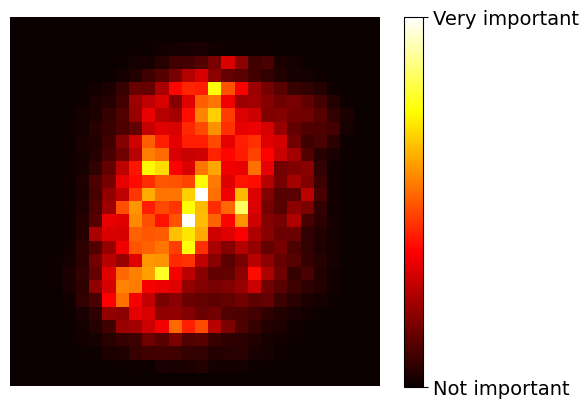

In [18]:
# extra code – this cell generates and saves Figure 7–6
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_openml

X_mnist, y_mnist = fetch_openml('mnist_784', return_X_y=True, as_frame=False,
                                parser='auto')

rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rnd_clf.fit(X_mnist, y_mnist)

heatmap_image = rnd_clf.feature_importances_.reshape(28, 28)
plt.imshow(heatmap_image, cmap="hot")
cbar = plt.colorbar(ticks=[rnd_clf.feature_importances_.min(),
                           rnd_clf.feature_importances_.max()])
cbar.ax.set_yticklabels(['Not important', 'Very important'], fontsize=14)
plt.axis("off")
#save_fig("mnist_feature_importance_plot")
plt.show()

#Boosting

Boosting methods try and combine several weak learners into a strong learner. The basic idea is to train several predictors sequentially allowing each predictor to correct the inaccuracies of the previous one.
One disadvantage of this method is that it has a limited ability to be parallelized as each predictor can only be trained after the precious predictor has been trained and evaluated.

##AdaBoost (Adaptive Boosting)

AdaBoost works with each predictor paying more attention to the training instances which are underfit. AdaBoost works by training a classifier, then predicting the training values and adjusting the weights to better match the misclassified training instances.

In [53]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

from sklearn.datasets import make_moons

X_moons, y_moons = make_moons(n_samples=10000, noise=0.4, random_state=42)

# Encode the continuous labels as discrete labels
y_moons = LabelEncoder().fit_transform(y_moons)

X_train, X_test, y_train, y_test = train_test_split(X_moons, y_moons,
                                                    test_size=0.2,
                                                    random_state=42)

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=200,
    algorithm="SAMME.R", learning_rate=0.5)

ada_clf.fit(X_train, y_train)

y_pred = ada_clf.predict(X_test)

accuracy_score(y_test, y_pred)



0.861

In [54]:
def plot_decision_boundary(clf, X, y, alpha=1.0):
    axes=[-1.5, 2.4, -1, 1.5]
    x1, x2 = np.meshgrid(np.linspace(axes[0], axes[1], 100),
                         np.linspace(axes[2], axes[3], 100))
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)

    plt.contourf(x1, x2, y_pred, alpha=0.3 * alpha, cmap='Wistia')
    plt.contour(x1, x2, y_pred, cmap="Greys", alpha=0.8 * alpha)
    colors = ["#78785c", "#c47b27"]
    markers = ("o", "^")
    for idx in (0, 1):
        plt.plot(X[:, 0][y == idx], X[:, 1][y == idx],
                 color=colors[idx], marker=markers[idx], linestyle="none")
    plt.axis(axes)
    plt.xlabel(r"$x_1$")
    plt.ylabel(r"$x_2$", rotation=0)

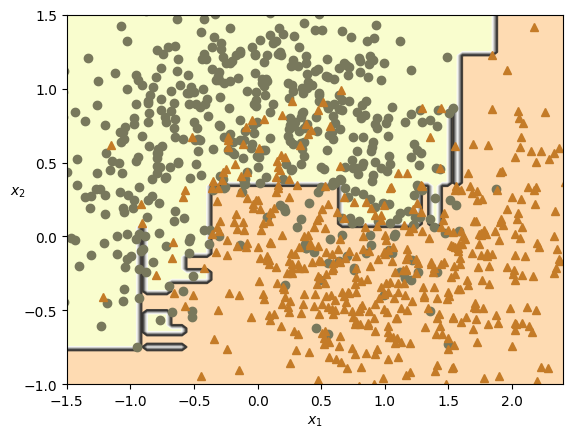

In [24]:
plot_decision_boundary(ada_clf, X,y)

##Gradient Boosting

Like AdaBoost, Gradient Boosting works by training a classifier and then adding predictors to each previous model. Where AdaBoost tweaks the instance weights at each iteration, Gradient Boosting fits a new predictor to the residual errors made by the previous predictor.

###Hyperparameters

•	learning_rate: Lower learning rates will will need more trees to fit the training data but will allow for more generalizable models. Reducing the learning rate is called shrinkage.
•	warm_start: Allows you to keep existing trees when the fit method is run so you can incrementally train an algorithm
•	subsample: Specifies the fraction of training instances to be used for training each tree. This method trades higher bias for lower variance, speeds up training, and is called Stochastic Gradient Boosting
•	loss: This allows you to change the cost function used by the boosting algorithm


In [25]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor

np.random.seed(42)
X = np.random.rand(100, 1) - 0.5
y = 3 * X[:, 0] ** 2 + 0.05 * np.random.randn(100)  # y = 3x² + Gaussian noise

tree_reg1 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg1.fit(X, y)

DecisionTreeRegressor(max_depth=2, random_state=42)

Now let's train another decision tree regressor on the residual errors made by the previous predictor:

In [27]:
y2 = y - tree_reg1.predict(X)
tree_reg2 = DecisionTreeRegressor(max_depth=2, random_state=43)
tree_reg2.fit(X, y2)

DecisionTreeRegressor(max_depth=2, random_state=43)

In [28]:
y3 = y2 - tree_reg2.predict(X)
tree_reg3 = DecisionTreeRegressor(max_depth=2, random_state=44)
tree_reg3.fit(X, y3)

DecisionTreeRegressor(max_depth=2, random_state=44)

In [29]:
X_new = np.array([[-0.4], [0.], [0.5]])
sum(tree.predict(X_new) for tree in (tree_reg1, tree_reg2, tree_reg3))

array([0.49484029, 0.04021166, 0.75026781])

The learning_rate hyperparameter scales the contribution of each tree. If you set it
to a low value, such as 0.1, you will need more trees in the ensemble to fit the train‐
ing set, but the predictions will usually generalize better. This is a regularization tech‐
nique called shrinkage.

In [55]:
gbrt_best = GradientBoostingRegressor(
    max_depth=2, learning_rate=0.05, n_estimators=500,
    n_iter_no_change=10, random_state=42)
gbrt_best.fit(X, y)

GradientBoostingRegressor(learning_rate=0.05, max_depth=2, n_estimators=500,
                          n_iter_no_change=10, random_state=42)

In [56]:
accuracy_score(y_test, y_pred)

0.861

In [33]:
gbrt_best.n_estimators_

92

In [57]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
X_train, X_val, y_train, y_val = train_test_split(X, y)
gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=120)
gbrt.fit(X_train, y_train)
errors = [mean_squared_error(y_val, y_pred)
 for y_pred in gbrt.staged_predict(X_val)]
bst_n_estimators = np.argmin(errors)
gbrt_best = GradientBoostingRegressor(max_depth=2,n_estimators=bst_n_estimators)
gbrt_best.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=2, n_estimators=103)

In [58]:
gbrt_best.n_estimators_

103

In [59]:
accuracy_score(y_test, y_pred)

0.861

you can use early stopping (see Chap‐
ter 4). A simple way to implement this is to use the staged_predict() method: it
returns an iterator over the predictions made by the ensemble at each stage of train‐
ing (with one tree, two trees, etc.).

##XGBoost
XGBoost stands for eXtreme Gradient Boosting and is an implementation of the Gradient Boosting algorithm with great performance on all kinds of datasets. It has been well known for regularly winning Kaggle competitions and like other boosting algorithms, is relatively compact and quick to train.


In [64]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder

# Download the make_moons dataset
X_moons, y_moons = make_moons(n_samples=10000, noise=0.4, random_state=42)

# Encode the continuous labels as discrete labels
y_moons = LabelEncoder().fit_transform(y_moons)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_moons, y_moons, test_size=0.2, random_state=42)

# Train an XGBoost model
xgb_clf = XGBClassifier(max_depth=1, random_state=42)
xgb_clf.fit(X_train, y_train)

# Calculate the cross-validation scores
cv_scores = cross_val_score(xgb_clf, X_train, y_train, cv=10, scoring='accuracy')
print("Cross-validation accuracy:", cv_scores.mean())

# Make predictions on the test set
y_pred = xgb_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Cross-validation accuracy: 0.8598750000000001
Accuracy: 0.868


##CatBoost
CatBoost is an algorithm created by Yandex in Russia. It's a high performance algorithm that works well with Categorical features that don't need to be preprocessed.
It's also very well integrated into other Machine Learning frameworks including Google's TensorFlow, Keras, and CoreML.


In [35]:
pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 4.5 MB/s eta 0:00:00


In [65]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder

# Download the make_moons dataset
X_moons, y_moons = make_moons(n_samples=10000, noise=0.4, random_state=42)

# Encode the continuous labels as discrete labels
y_moons = LabelEncoder().fit_transform(y_moons)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_moons, y_moons, test_size=0.2, random_state=42)

# Train a CatBoost model
cat_clf = CatBoostClassifier(depth=1, random_state=42)
cat_clf.fit(X_train, y_train)

# Calculate the cross-validation scores
cv_scores = cross_val_score(cat_clf, X_train, y_train, cv=10, scoring='accuracy')
print("Cross-validation accuracy:", cv_scores.mean())

# Make predictions on the test set
y_pred = cat_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Streaming output truncated to the last 5000 lines.
6:	learn: 0.6455505	total: 13.9ms	remaining: 1.98s
7:	learn: 0.6399495	total: 16.2ms	remaining: 2.01s
8:	learn: 0.6345182	total: 18ms	remaining: 1.98s
9:	learn: 0.6293966	total: 19.8ms	remaining: 1.96s
10:	learn: 0.6244699	total: 22.9ms	remaining: 2.06s
11:	learn: 0.6196483	total: 26.9ms	remaining: 2.21s
12:	learn: 0.6150831	total: 28.7ms	remaining: 2.18s
13:	learn: 0.6107480	total: 30.4ms	remaining: 2.14s
14:	learn: 0.6066176	total: 32.3ms	remaining: 2.12s
15:	learn: 0.6016542	total: 34ms	remaining: 2.09s
16:	learn: 0.5978145	total: 35.5ms	remaining: 2.05s
17:	learn: 0.5940603	total: 37.3ms	remaining: 2.03s
18:	learn: 0.5903113	total: 39ms	remaining: 2.01s
19:	learn: 0.5861712	total: 40.8ms	remaining: 2s
20:	learn: 0.5822217	total: 42.6ms	remaining: 1.99s
21:	learn: 0.5778975	total: 44.4ms	remaining: 1.97s
22:	learn: 0.5736636	total: 46.4ms	remaining: 1.97s
23:	learn: 0.5700087	total: 48.1ms	remaining: 1.96s
24:	learn: 0.5667905	total

##LightGBM
LightGBM is a gradient boosting algorithm created by Microsoft that is particularly lightweight and easy to use. As you can see there's a lot of work in the space of boosting algorithms with a new best algorithm coming up every couple of years.


In [69]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder

# Download the make_moons dataset
X_moons, y_moons = make_moons(n_samples=10000, noise=0.4, random_state=42)

# Encode the continuous labels as discrete labels
y_moons = LabelEncoder().fit_transform(y_moons)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_moons, y_moons, test_size=0.2, random_state=42)

# Train an XGBoost model
xgb_clf = XGBClassifier(max_depth=1, random_state=42)
xgb_clf.fit(X_train, y_train)

# Calculate the cross-validation scores
cv_scores = cross_val_score(xgb_clf, X_train, y_train, cv=10, scoring='accuracy')
print("Cross-validation accuracy:", cv_scores.mean())

# Make predictions on the test set
y_pred = xgb_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Cross-validation accuracy: 0.8598750000000001
Accuracy: 0.868


#Stacking (Stacked Generalization)

Stacking is another ensemble method and simply refers to using another model to perform the final aggregation step that we used to perform using hard or soft-voting.
You have multiple predictors that output their own predictions, then use those predictions as inputs in a model called the blender or meta-learner to create a final prediction.

skLearn does not currently support this framework of modeling.

In [70]:
from sklearn.ensemble import StackingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

# Download the make_moons dataset
X_moons, y_moons = make_moons(n_samples=10000, noise=0.4, random_state=42)

# Encode the continuous labels as discrete labels
y_moons = LabelEncoder().fit_transform(y_moons)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_moons, y_moons, test_size=0.2, random_state=42)

# Train an XGBoost model
xgb_clf = XGBClassifier(max_depth=1, random_state=42)
xgb_clf.fit(X_train, y_train)

# Calculate the cross-validation scores
cv_scores = cross_val_score(xgb_clf, X_train, y_train, cv=10, scoring='accuracy')
print("Cross-validation accuracy:", cv_scores.mean())

# Make predictions on the test set
y_pred = xgb_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Cross-validation accuracy: 0.8598750000000001
Accuracy: 0.868
